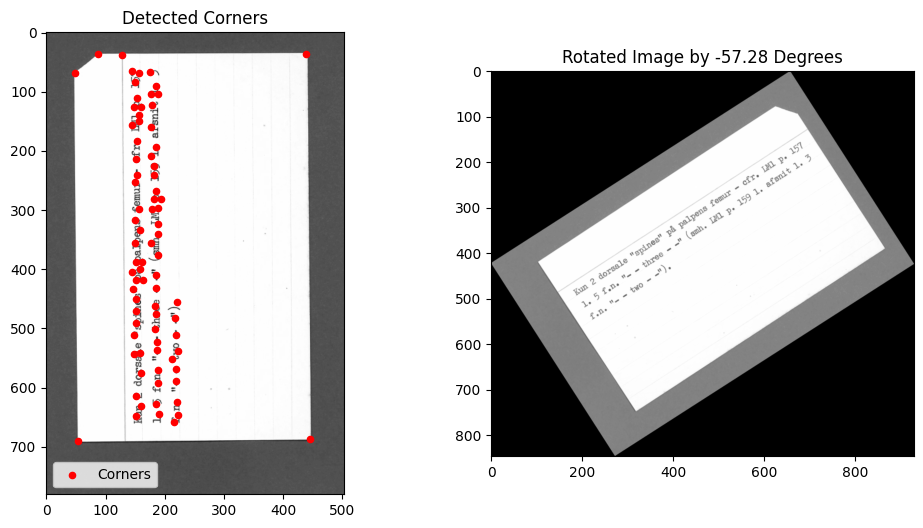

Estimated Rotation Angle: -57.28 degrees


In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, transform, color
from skimage.feature import corner_harris, corner_peaks

# Load image in grayscale
image_path = "../TestImages/Week 6/textlabel_gray_small.png"
image = io.imread(image_path, as_gray=True)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Detect corners using Harris corner detector
corners_response = corner_harris(blurred_image, method='k', k=0.04, sigma=1)
corners = corner_peaks(corners_response, min_distance=10, threshold_rel=0.01)

# Convert to (x, y) format for OpenCV
corners = np.fliplr(corners)  # Convert (row, col) to (x, y)

# Heuristic to find the four most relevant corners
# Sort by x-coordinates and then y-coordinates
sorted_corners = sorted(corners, key=lambda x: (x[0], x[1]))

# Select top-left, top-right, bottom-left, bottom-right based on sorting
top_left, top_right = sorted_corners[0], sorted_corners[-1]
bottom_left, bottom_right = sorted_corners[1], sorted_corners[-2]

# Compute the angle using atan2
delta_x = top_right[0] - top_left[0]
delta_y = top_right[1] - top_left[1]
angle = np.arctan2(delta_y, delta_x) * (180.0 / np.pi)  # Convert to degrees

# Rotate image to correct orientation
rotated_image = transform.rotate(image, -angle, resize=True)

# Plot detected corners
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap="gray")
ax[0].scatter(corners[:, 0], corners[:, 1], color="red", s=20, label="Corners")
ax[0].set_title("Detected Corners")
ax[0].legend()

ax[1].imshow(rotated_image, cmap="gray")
ax[1].set_title(f"Rotated Image by {-angle:.2f} Degrees")

plt.show()

# Print estimated rotation angle
print(f"Estimated Rotation Angle: {-angle:.2f} degrees")
